In [1]:
import pandas as pd
import numpy as np 
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [3]:
#sent question through SLACK about solution I found on StackOverflow to change cross_validation with model_selection to remedy the import error I am getting for train_test_split
#instead of using code provided in lesson outline, I had to change and use sklearn.model_selection import train_test_split
#Python open libraries are an open source and always evolving 
#Modules can be moved from one library to another sometimes 
#I was receiving the import error 'No midule named sklearn.cross_validation' because train_test_split moved to model_selection from cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
#since I had problems with matplot lib in prior task, re-importing as %matplotlib inline
%matplotlib inline 
import matplotlib.pyplot as plt

In [5]:
credit1=pd.read_csv('export_credit1.csv')

In [6]:
#"it is very important to understand this task uses the CreditOne data in a regression type problem"
#regression is the problem of predicting a continous quantity output
#HOW MUCH CREDIT SHOULD THEY ALLOW SOMEONE 
credit1.head()

Unnamed: 0  Unnamed: 0.1  ID  CREDITLIMIT     SEX   EDUCATION  \
0           0             0   1        20000  female  university   
1           1             1   2       120000  female  university   
2           2             2   3        90000  female  university   
3           3             3   4        50000  female  university   
4           4             4   5        50000    male  university   

   MARRIAGESTATUS  AGE  APRPAYSTATUS  MAYPAYSTATUS  ...  JUNSTMT  MAYSTMT  \
0               1   24             2             2  ...        0        0   
1               2   26            -1             2  ...     3272     3455   
2               2   34             0             0  ...    14331    14948   
3               1   37             0             0  ...    28314    28959   
4               1   57            -1             0  ...    20940    19146   

   APRSTMT  SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  \
0        0             0           689             0             0   
1     3261             0          1000          1000          1000   
2    15549          1518          1500          1000          1000   
3    29547          2000          2019          1200          1100   
4    19131          2000         36681         10000          9000   

   MAYPREVPYMNT  APRPREVPYMNT  default payment next month  
0             0             0                     default  
1             0          2000                     default  
2          1000          5000                 not default  
3          1069          1000                 not default  
4           689           679                 not default  

[5 rows x 27 columns]

In [7]:
#checking data types and it appears I am good to go with task 3
credit1.dtypes

Unnamed: 0                     int64
Unnamed: 0.1                   int64
ID                             int64
CREDITLIMIT                    int64
SEX                           object
EDUCATION                     object
MARRIAGESTATUS                 int64
AGE                            int64
APRPAYSTATUS                   int64
MAYPAYSTATUS                   int64
JUNPAYSTATUS                   int64
JULPAYSTATUS                   int64
AUGPAYSTATUS                   int64
SEPPAYSTATUS                   int64
SEPSTMT                        int64
AUGSTMT                        int64
JULSTMT                        int64
JUNSTMT                        int64
MAYSTMT                        int64
APRSTMT                        int64
SEPPREVPYMNT                   int64
AUGPREVPYMNT                   int64
JULPREVPYMNT                   int64
JUNPREVPYMNT                   int64
MAYPREVPYMNT                   int64
APRPREVPYMNT                   int64
default payment next month    object
d

In [8]:
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
Unnamed: 0                    30000 non-null int64
Unnamed: 0.1                  30000 non-null int64
ID                            30000 non-null int64
CREDITLIMIT                   30000 non-null int64
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGESTATUS                30000 non-null int64
AGE                           30000 non-null int64
APRPAYSTATUS                  30000 non-null int64
MAYPAYSTATUS                  30000 non-null int64
JUNPAYSTATUS                  30000 non-null int64
JULPAYSTATUS                  30000 non-null int64
AUGPAYSTATUS                  30000 non-null int64
SEPPAYSTATUS                  30000 non-null int64
SEPSTMT                       30000 non-null int64
AUGSTMT                       30000 non-null int64
JULSTMT                       30000 non-null int64
JUNSTMT               

In [9]:
#after watching class from 2 weeks ago, realized GradientBoostingRegressor is needed as well 
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
#following Ben's process and renamed default columns, dropped columns not needed
credit1['default']=credit1['default payment next month']
credit1=credit1.drop(['ID','Unnamed: 0','Unnamed: 0.1','default payment next month'], axis=1)

In [11]:
#checking column headings now 
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
CREDITLIMIT       30000 non-null int64
SEX               30000 non-null object
EDUCATION         30000 non-null object
MARRIAGESTATUS    30000 non-null int64
AGE               30000 non-null int64
APRPAYSTATUS      30000 non-null int64
MAYPAYSTATUS      30000 non-null int64
JUNPAYSTATUS      30000 non-null int64
JULPAYSTATUS      30000 non-null int64
AUGPAYSTATUS      30000 non-null int64
SEPPAYSTATUS      30000 non-null int64
SEPSTMT           30000 non-null int64
AUGSTMT           30000 non-null int64
JULSTMT           30000 non-null int64
JUNSTMT           30000 non-null int64
MAYSTMT           30000 non-null int64
APRSTMT           30000 non-null int64
SEPPREVPYMNT      30000 non-null int64
AUGPREVPYMNT      30000 non-null int64
JULPREVPYMNT      30000 non-null int64
JUNPREVPYMNT      30000 non-null int64
MAYPREVPYMNT      30000 non-null int64
APRPREVPYMNT      30000 non-nul

In [12]:
#checking for duplicate rows and null values 
credit1=credit1.drop_duplicates()
nulls=credit1.isnull().sum()
nulls

CREDITLIMIT       0
SEX               0
EDUCATION         0
MARRIAGESTATUS    0
AGE               0
APRPAYSTATUS      0
MAYPAYSTATUS      0
JUNPAYSTATUS      0
JULPAYSTATUS      0
AUGPAYSTATUS      0
SEPPAYSTATUS      0
SEPSTMT           0
AUGSTMT           0
JULSTMT           0
JUNSTMT           0
MAYSTMT           0
APRSTMT           0
SEPPREVPYMNT      0
AUGPREVPYMNT      0
JULPREVPYMNT      0
JUNPREVPYMNT      0
MAYPREVPYMNT      0
APRPREVPYMNT      0
default           0
dtype: int64

In [13]:
#going to rename dataset credit to keep it simple 
credit=credit1

In [14]:
credit.dtypes

CREDITLIMIT        int64
SEX               object
EDUCATION         object
MARRIAGESTATUS     int64
AGE                int64
APRPAYSTATUS       int64
MAYPAYSTATUS       int64
JUNPAYSTATUS       int64
JULPAYSTATUS       int64
AUGPAYSTATUS       int64
SEPPAYSTATUS       int64
SEPSTMT            int64
AUGSTMT            int64
JULSTMT            int64
JUNSTMT            int64
MAYSTMT            int64
APRSTMT            int64
SEPPREVPYMNT       int64
AUGPREVPYMNT       int64
JULPREVPYMNT       int64
JUNPREVPYMNT       int64
MAYPREVPYMNT       int64
APRPREVPYMNT       int64
default           object
dtype: object

In [15]:
#describe is telling me there are 2 unique variables in this column, making it binary (variables that take only 2 values )
#this is a regression problem and everything has to be numeric 
#label encoding will allow us to change this to a binary numeric variable for our REGRESSION problem 
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [16]:
#received error using LabelEncoder() as shown in Ben's notebook during walk-thru 
#Googled and imported the preprocessing module from sklearn 
#Function name updated to le=preprocessing.LabelEncoder()
#LabelEncoding is converting a string categorical name to a number, i.e. converting SEX from male to female to 0 and 1
from sklearn import preprocessing

In [17]:
le = preprocessing.LabelEncoder()

In [18]:
le = preprocessing.LabelEncoder()
le.fit(credit['SEX'])
credit['SEX']=le.transform(credit['SEX'])

In [19]:
#checking to make sure LabelEncoder() worked for SEX, and it did 
credit1.dtypes

CREDITLIMIT        int64
SEX                int32
EDUCATION         object
MARRIAGESTATUS     int64
AGE                int64
APRPAYSTATUS       int64
MAYPAYSTATUS       int64
JUNPAYSTATUS       int64
JULPAYSTATUS       int64
AUGPAYSTATUS       int64
SEPPAYSTATUS       int64
SEPSTMT            int64
AUGSTMT            int64
JULSTMT            int64
JUNSTMT            int64
MAYSTMT            int64
APRSTMT            int64
SEPPREVPYMNT       int64
AUGPREVPYMNT       int64
JULPREVPYMNT       int64
JUNPREVPYMNT       int64
MAYPREVPYMNT       int64
APRPREVPYMNT       int64
default           object
dtype: object

In [20]:
le = preprocessing.LabelEncoder()
le.fit(credit['default'])
credit['default']=le.transform(credit['default'])

In [21]:
#One Hot Encoding needed for REGRESSION problems only not needed for Classification 
#Used for variables in a Regression problem that has multiple classes in it (more than 2 categories, more than yes/no male/female, etc)
#Regression problems can only read variables 2 classes deep 
#Need to convert/engineer variable into a number of new variables (EDUCATION, MARRIAGE, etc)
#For every class in EDUCATION, One Hot Encoding makes brand new column for each class and each column is going to be binary
#Ex: one column created for HighSchool yes/no (or 0/1), University yes/no (0/1), etc 
credit=pd.get_dummies(credit)

In [22]:
#one hot encoding completed as you can tell from the new columns created for each class of EDUCATION
#each of those new columns were classes within EDUCATION 
credit.dtypes

CREDITLIMIT                  int64
SEX                          int32
MARRIAGESTATUS               int64
AGE                          int64
APRPAYSTATUS                 int64
MAYPAYSTATUS                 int64
JUNPAYSTATUS                 int64
JULPAYSTATUS                 int64
AUGPAYSTATUS                 int64
SEPPAYSTATUS                 int64
SEPSTMT                      int64
AUGSTMT                      int64
JULSTMT                      int64
JUNSTMT                      int64
MAYSTMT                      int64
APRSTMT                      int64
SEPPREVPYMNT                 int64
AUGPREVPYMNT                 int64
JULPREVPYMNT                 int64
JUNPREVPYMNT                 int64
MAYPREVPYMNT                 int64
APRPREVPYMNT                 int64
default                      int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

In [23]:
credit.describe()

CREDITLIMIT           SEX  MARRIAGESTATUS           AGE  \
count    29965.000000  29965.000000    29965.000000  29965.000000   
mean    167442.005006      0.396262        1.551877     35.487969   
std     129760.135222      0.489128        0.521997      9.219459   
min      10000.000000      0.000000        0.000000     21.000000   
25%      50000.000000      0.000000        1.000000     28.000000   
50%     140000.000000      0.000000        2.000000     34.000000   
75%     240000.000000      1.000000        2.000000     41.000000   
max    1000000.000000      1.000000        3.000000     79.000000   

       APRPAYSTATUS  MAYPAYSTATUS  JUNPAYSTATUS  JULPAYSTATUS  AUGPAYSTATUS  \
count  29965.000000  29965.000000  29965.000000  29965.000000  29965.000000   
mean      -0.016753     -0.131854     -0.164392     -0.218922     -0.264509   
std        1.123492      1.196322      1.195878      1.168175      1.132220   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       SEPPAYSTATUS  ...  AUGPREVPYMNT   JULPREVPYMNT   JUNPREVPYMNT  \
count  29965.000000  ...  2.996500e+04   29965.000000   29965.000000   
mean      -0.289438  ...  5.927983e+03    5231.688837    4831.617454   
std        1.149090  ...  2.305346e+04   17616.361124   15674.464538   
min       -2.000000  ...  0.000000e+00       0.000000       0.000000   
25%       -1.000000  ...  8.500000e+02     390.000000     300.000000   
50%        0.000000  ...  2.010000e+03    1804.000000    1500.000000   
75%        0.000000  ...  5.000000e+03    4512.000000    4016.000000   
max        8.000000  ...  1.684259e+06  896040.000000  621000.000000   

        MAYPREVPYMNT   APRPREVPYMNT       default  EDUCATION_graduate school  \
count   29965.000000   29965.000000  29965.000000               29965.000000   
mean     4804.897047    5221.498014      0.778742                   0.352511   
std     15286.372298   17786.976864      0.415101                   0.477760   
min         0.000000       0.000000      0.000000                   0.000000   
25%       261.000000     131.000000      1.000000                   0.000000   
50%      1500.000000    1500.000000      1.000000                   0.000000   
75%      4042.000000    4000.000000      1.000000                   1.000000   
max    426529.000000  528666.000000      1.000000                   1.000000   

       EDUCATION_high school  EDUCATION_other  EDUCATION_university  
count           29965.000000     29965.000000          29965.000000  
mean                0.164025         0.015618              0.467846  
std                 0.370304         0.123995              0.498973  
min                 0.000000         0.000000              0.000000  
25%                 0.000000         0.000000              0.000000  
50%                 0.000000         0.000000              0.000000  
75%                 0.000000         0.000000              1.000000  
max                 1.000000         1.000000              1.000000  

[8 rows x 27 columns]

In [24]:
#since -2 and -1 for the pay amount variables = no credit used, or paid in full, neither of these impact default rates
#instead of removing these classes from the dataset, we are 0'ng them out - or taking their value away so there's no affect on model performance
credit['APRPAYSTATUS']=credit['APRPAYSTATUS'].replace(-2,0)
credit['MAYPAYSTATUS']=credit['MAYPAYSTATUS'].replace(-2,0)
credit['JUNPAYSTATUS']=credit['JUNPAYSTATUS'].replace(-2,0)
credit['JULPAYSTATUS']=credit['JULPAYSTATUS'].replace(-2,0)
credit['AUGPAYSTATUS']=credit['AUGPAYSTATUS'].replace(-2,0)
credit['SEPPAYSTATUS']=credit['SEPPAYSTATUS'].replace(-2,0)


credit['APRPAYSTATUS']=credit['APRPAYSTATUS'].replace(-1,0)
credit['MAYPAYSTATUS']=credit['MAYPAYSTATUS'].replace(-1,0)
credit['JUNPAYSTATUS']=credit['JUNPAYSTATUS'].replace(-1,0)
credit['JULPAYSTATUS']=credit['JULPAYSTATUS'].replace(-1,0)
credit['AUGPAYSTATUS']=credit['AUGPAYSTATUS'].replace(-1,0)
credit['SEPPAYSTATUS']=credit['SEPPAYSTATUS'].replace(-1,0)

 F.E.W = FILTERING, EMBEDEED, WRAPPER - Feature Selection Methods (RFE) 


In [25]:
import seaborn as sn

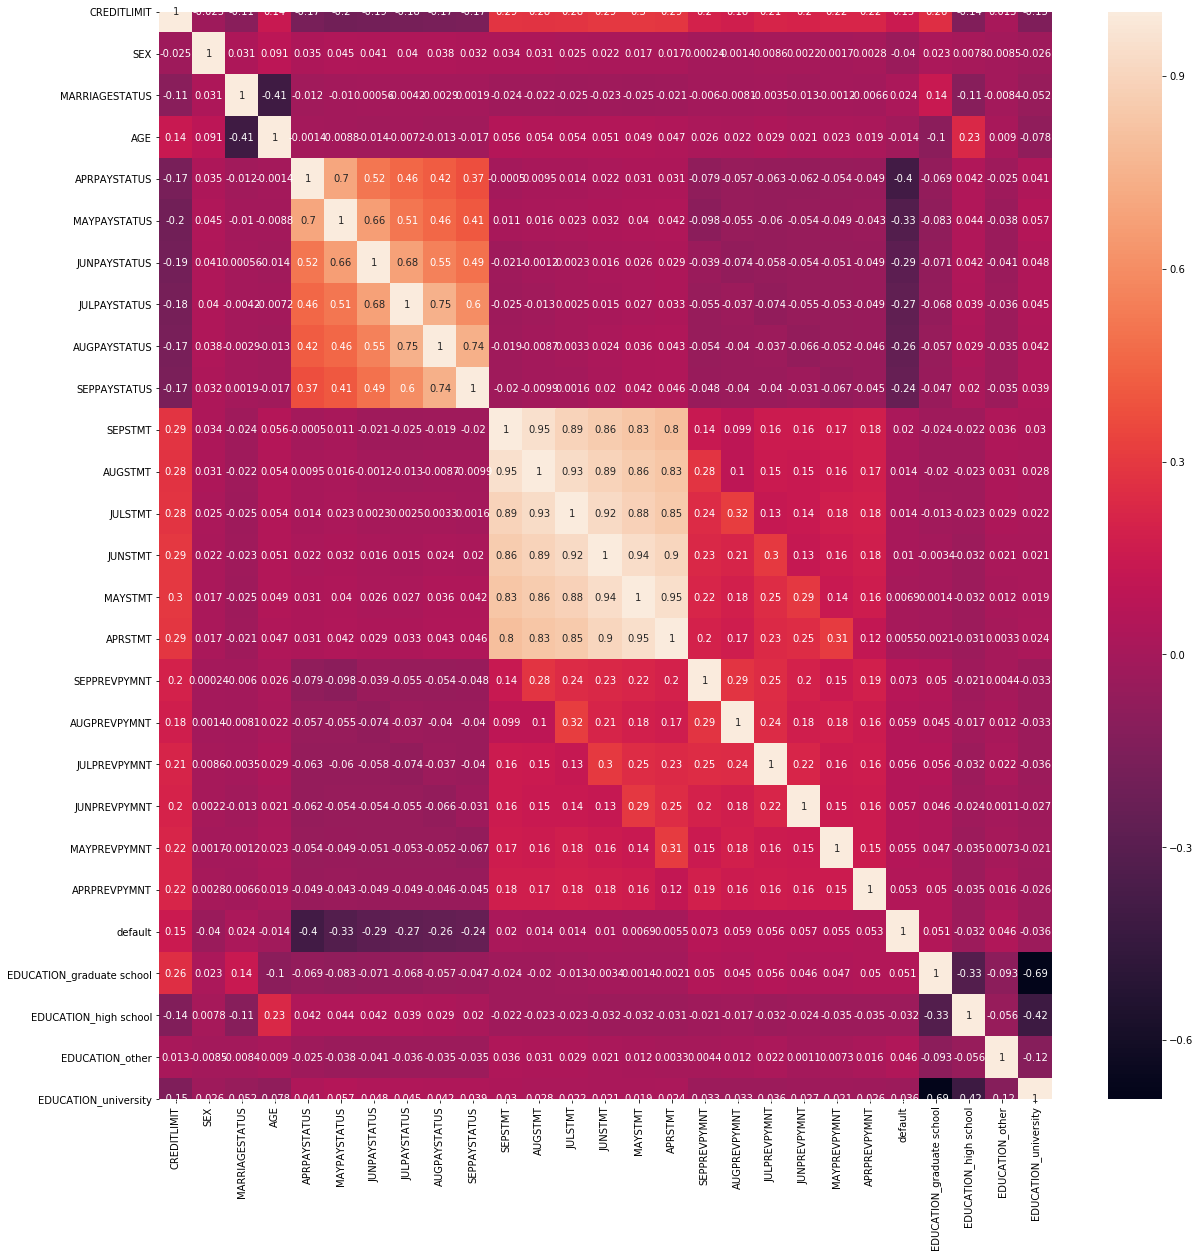

In [26]:
#Heatmap for feature selection 
#Using Ben's notebook as a baseline to understand the heatmap 
#Age, Sex, APR-SEPPAYSTATUS', and EDUCATION (except Graduate School) were omitted from his dataset due to low correlation 
#APR-SEPPAYSTATUS appear in heatmap as dark purple color with -numbers...the darker the color, the weaker the relationship?
#SEX has a -0.014 correlation score 
#MARRIAGESTATUS shows -0.4
#GraduateSchool has a + score of 0.051
credit_corr=credit.corr()
plt.figure(figsize=(20,20))
sn.heatmap(credit_corr, annot=True)
plt.show()

In [27]:
credit.head()

CREDITLIMIT  SEX  MARRIAGESTATUS  AGE  APRPAYSTATUS  MAYPAYSTATUS  \
0        20000    0               1   24             2             2   
1       120000    0               2   26             0             2   
2        90000    0               2   34             0             0   
3        50000    0               1   37             0             0   
4        50000    1               1   57             0             0   

   JUNPAYSTATUS  JULPAYSTATUS  AUGPAYSTATUS  SEPPAYSTATUS  ...  AUGPREVPYMNT  \
0             0             0             0             0  ...           689   
1             0             0             0             2  ...          1000   
2             0             0             0             0  ...          1500   
3             0             0             0             0  ...          2019   
4             0             0             0             0  ...         36681   

   JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  APRPREVPYMNT  default  \
0             0             0             0             0        0   
1          1000          1000             0          2000        0   
2          1000          1000          1000          5000        1   
3          1200          1100          1069          1000        1   
4         10000          9000           689           679        1   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_other  \
0                          0                      0                0   
1                          0                      0                0   
2                          0                      0                0   
3                          0                      0                0   
4                          0                      0                0   

   EDUCATION_university  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 27 columns]

In [28]:
credit.head()

CREDITLIMIT  SEX  MARRIAGESTATUS  AGE  APRPAYSTATUS  MAYPAYSTATUS  \
0        20000    0               1   24             2             2   
1       120000    0               2   26             0             2   
2        90000    0               2   34             0             0   
3        50000    0               1   37             0             0   
4        50000    1               1   57             0             0   

   JUNPAYSTATUS  JULPAYSTATUS  AUGPAYSTATUS  SEPPAYSTATUS  ...  AUGPREVPYMNT  \
0             0             0             0             0  ...           689   
1             0             0             0             2  ...          1000   
2             0             0             0             0  ...          1500   
3             0             0             0             0  ...          2019   
4             0             0             0             0  ...         36681   

   JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  APRPREVPYMNT  default  \
0             0             0             0             0        0   
1          1000          1000             0          2000        0   
2          1000          1000          1000          5000        1   
3          1200          1100          1069          1000        1   
4         10000          9000           689           679        1   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_other  \
0                          0                      0                0   
1                          0                      0                0   
2                          0                      0                0   
3                          0                      0                0   
4                          0                      0                0   

   EDUCATION_university  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 27 columns]

In [29]:
credit=credit.drop(['APRPAYSTATUS','MAYPAYSTATUS','JUNPAYSTATUS','JULPAYSTATUS','AUGPAYSTATUS','SEPPAYSTATUS'], axis=1)

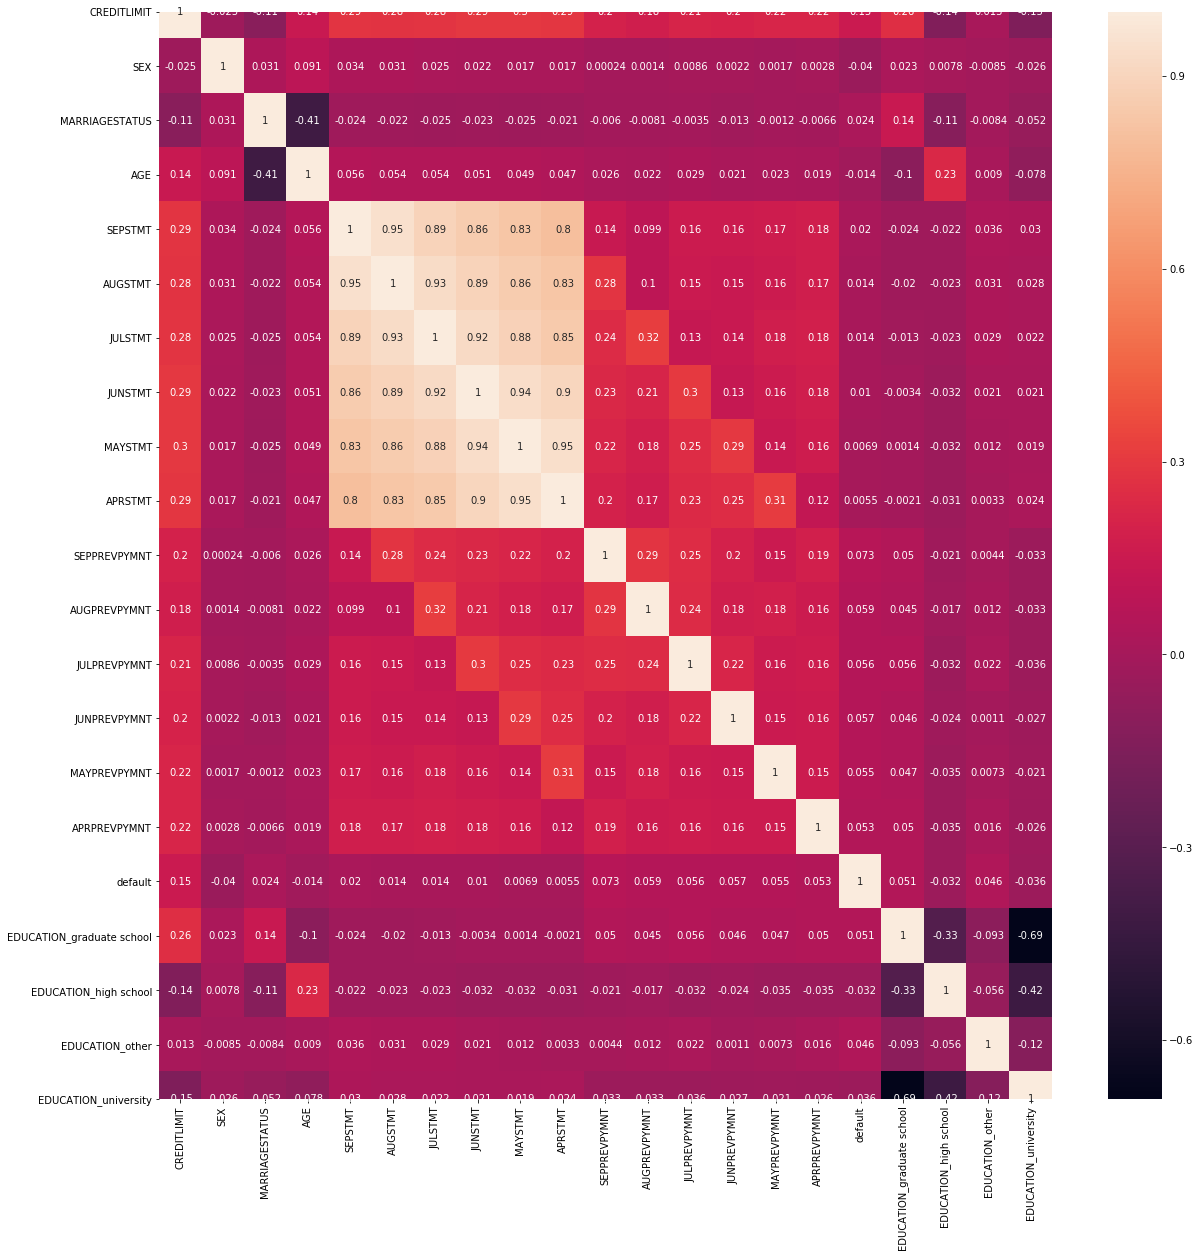

In [30]:
#taking out those variables still does not really show me any correlation between these features and whether a customer will default
credit_corr=credit.corr()
plt.figure(figsize=(20,20))
sn.heatmap(credit_corr, annot=True)
plt.show()

START OF TRAIN TEST SPLIT AND MODEL BUILDING 

In [33]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 21 columns):
CREDITLIMIT                  29965 non-null int64
SEX                          29965 non-null int32
MARRIAGESTATUS               29965 non-null int64
AGE                          29965 non-null int64
SEPSTMT                      29965 non-null int64
AUGSTMT                      29965 non-null int64
JULSTMT                      29965 non-null int64
JUNSTMT                      29965 non-null int64
MAYSTMT                      29965 non-null int64
APRSTMT                      29965 non-null int64
SEPPREVPYMNT                 29965 non-null int64
AUGPREVPYMNT                 29965 non-null int64
JULPREVPYMNT                 29965 non-null int64
JUNPREVPYMNT                 29965 non-null int64
MAYPREVPYMNT                 29965 non-null int64
APRPREVPYMNT                 29965 non-null int64
default                      29965 non-null int32
EDUCATION_graduate school    29965 non-nu

In [34]:
credit.head()

CREDITLIMIT  SEX  MARRIAGESTATUS  AGE  SEPSTMT  AUGSTMT  JULSTMT  JUNSTMT  \
0        20000    0               1   24     3913     3102      689        0   
1       120000    0               2   26     2682     1725     2682     3272   
2        90000    0               2   34    29239    14027    13559    14331   
3        50000    0               1   37    46990    48233    49291    28314   
4        50000    1               1   57     8617     5670    35835    20940   

   MAYSTMT  APRSTMT  ...  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  \
0        0        0  ...           689             0             0   
1     3455     3261  ...          1000          1000          1000   
2    14948    15549  ...          1500          1000          1000   
3    28959    29547  ...          2019          1200          1100   
4    19146    19131  ...         36681         10000          9000   

   MAYPREVPYMNT  APRPREVPYMNT  default  EDUCATION_graduate school  \
0             0             0        0                          0   
1             0          2000        0                          0   
2          1000          5000        1                          0   
3          1069          1000        1                          0   
4           689           679        1                          0   

   EDUCATION_high school  EDUCATION_other  EDUCATION_university  
0                      0                0                     1  
1                      0                0                     1  
2                      0                0                     1  
3                      0                0                     1  
4                      0                0                     1  

[5 rows x 21 columns]

In [35]:
credit=credit.drop(['EDUCATION_high school','EDUCATION_other','EDUCATION_university'], axis=1)

In [36]:
credit.head()

CREDITLIMIT  SEX  MARRIAGESTATUS  AGE  SEPSTMT  AUGSTMT  JULSTMT  JUNSTMT  \
0        20000    0               1   24     3913     3102      689        0   
1       120000    0               2   26     2682     1725     2682     3272   
2        90000    0               2   34    29239    14027    13559    14331   
3        50000    0               1   37    46990    48233    49291    28314   
4        50000    1               1   57     8617     5670    35835    20940   

   MAYSTMT  APRSTMT  SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  \
0        0        0             0           689             0             0   
1     3455     3261             0          1000          1000          1000   
2    14948    15549          1518          1500          1000          1000   
3    28959    29547          2000          2019          1200          1100   
4    19146    19131          2000         36681         10000          9000   

   MAYPREVPYMNT  APRPREVPYMNT  default  EDUCATION_graduate school  
0             0             0        0                          0  
1             0          2000        0                          0  
2          1000          5000        1                          0  
3          1069          1000        1                          0  
4           689           679        1                          0

In [38]:
#rearranging my columns 
credit=credit[['CREDITLIMIT','SEPSTMT','AUGSTMT','JULSTMT','JUNSTMT','MAYSTMT','APRSTMT','SEPPREVPYMNT','AUGPREVPYMNT','JULPREVPYMNT','JUNPREVPYMNT','MAYPREVPYMNT','APRPREVPYMNT','EDUCATION_graduate school','default']]

In [39]:
#since I want to pick default as my dependent variable, I need to move EDUCATION_graduate school 
X = credit.iloc[:,0:13]
print('Summary of feature sample')
X.head()

Summary of feature sample


CREDITLIMIT  SEPSTMT  AUGSTMT  JULSTMT  JUNSTMT  MAYSTMT  APRSTMT  \
0        20000     3913     3102      689        0        0        0   
1       120000     2682     1725     2682     3272     3455     3261   
2        90000    29239    14027    13559    14331    14948    15549   
3        50000    46990    48233    49291    28314    28959    29547   
4        50000     8617     5670    35835    20940    19146    19131   

   SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  \
0             0           689             0             0             0   
1             0          1000          1000          1000             0   
2          1518          1500          1000          1000          1000   
3          2000          2019          1200          1100          1069   
4          2000         36681         10000          9000           689   

   APRPREVPYMNT  
0             0  
1          2000  
2          5000  
3          1000  
4           679

In [42]:
y=credit['default']

In [43]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: default, dtype: int32

In [45]:

#these are my 3 models: Random Forest Regressor, Linear Regression, Support Vector Regression
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [47]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warni

In [52]:
for i in range(len('Random Forest Regressor')):
    print(names[i],results[i].mean())

Random Forest Regressor 0.005847102482666659
Linear Regression 0.027013598851218384
Support Vector Regression -0.023246788990472316


IndexError: list index out of range

In [53]:
#TRAIN_TEST_SPLIT
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = .30, random_state=123)

In [66]:
#choosing Linear Regression as my model as it performed the best out of the 3 listed above
#training model on training data set
algoL = LinearRegression()
lmodel = algoL.fit(X_train,y_train)


In [69]:
predictions = lmodel.predict(X_test)

In [70]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [71]:
predRsquared = r2_score(y_test,predictions)

In [72]:
predictions = lmodel.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.025
RMSE: 0.410
